# Installing an Image Processing Toolkit on Raspberry Pi

The purpose of this notebook is to outline a workflow and toolkit for capturing and processing images forlaboratory use on the Raspberry Pi. There are, of course, a nearly limitless collection of tools that can be adapted for laboratory use, and numerous specialized software packages. The particular workflow desecribed below is oriented to the use of Jupyter notebooks to document the analysis of images, and the use of the most common image libraries in Python.

1. Installing Jupyter Notebook
    * Miniconda
    
2. Image Capture
    * PiCamera 2
    
3. Image Processing Libraries
    * PIL
    * scipy ndimage
    * OpenCV
    * scikit-image
    
4. ML Libraries
    * tensorflow
    * scikit-learn
    
    

## 1. Installing Miniconda on Raspberry Pi (64 bit)

### Download and Installation

Anaconda is a big package with a comprehensive set of Python libraries and application utilities. Miniconda is a smaller alternative that relies on user intervention for downloading needed libraries and applications. 

Go to this page for a version of Miniconda that works with RaspOS: https://github.com/conda-forge/miniforge. Download the version labeld "aarch64 (arm64)". This is a large download and may take many minutes to complete.

After the download is complete, open an terminal window, navigate to the Downloads directory, and execute the shell script.

    ls Downloads
    sh Miniforge3-Linux-aarch64.sh
    
A new folder `miniforge3` will appear in the home directory. This is a long process requiring you to respond to various prompts. When complete, close and reopen the terminal window. If all went well, then command line

     conda

should return a help message. Executing

    conda update conda 
    
will bring the conda environment up to date.
    
    
### Install Jupyter

To install Jupyter, execute

    conda install jupyter

You can test the Jupyter environment on the Raspberry Pi with 

    jupyter lab
    
You may be asked for your password. 

### Accessing Jupyter Remotely

One of the excellent features of Miniconda is that you can access the Jupyter server remotely. That is, you can be doing your typing, coding, and analysis remotely on your laptop while the Raspberry Pi server remains attached to your laboratory equipment. The following steps are adapted from https://towardsdatascience.com/remote-computing-with-jupyter-notebooks-5b2860f761e8

1. Confirm your laptop is on the same network.

2. On your laptop, open a terminal or command window use ping to locate the Raspberry Pi. Note the IP address which will be in the form XXX.XXX.XXX.XXX

        ping raspberrypi
        
3. From the laptop, open an `ssh` session. Follow prompts to login to the Raspberry Pi.

        ssh username@XXX.XXX.XXX.XXX
        
4. Open a jupyter session 

        jupyter lab --no-browser 
        
5. Redirect port traffic from the Raspberry Pi. Open another terminal or command window, and issue the command. Answer any prompts that may appear.

        ssh -N -L localhost:8890:localhost:8889 username@XXX.XXX.XXX.XXX
        
6. Finally, open a browser window on your laptop and open the following web address. You should now have a Jupyter lab session that is connected to the Raspberry Pi.

        localhost:8890/lab
        
From this point on you should be be able to use to the Raspberry Pi remotely.

## Image Capture

Image capture refers to the capture of images using a connected camera. The workflow begins with the

### Installing PiCamera2

    sudo apt install -y python3-picamera2

In [1]:
!sudo apt install -y python3-picamera2

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libfuse2 libmikmod3 libportmidi0 librtimulib-dev librtimulib-utils
  librtimulib7 libsdl-mixer1.2 libsdl-ttf2.0-0 python3-rtimulib
Use 'sudo apt autoremove' to remove them.
The following packages will be upgraded:
  python3-picamera2
1 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
Need to get 46.1 kB of archives.
After this operation, 3,072 B of additional disk space will be used.
Get:1 http://archive.raspberrypi.org/debian bullseye/main arm64 python3-picamera2 all 0.3.7-1 [46.1 kB]
Fetched 46.1 kB in 1s (78.8 kB/s)          
apt-listchanges: Reading changelogs...

(Reading database ... 111885 files and directories currently installed.)
Preparing to unpack .../python3-picamera2_0.3.7-1_all.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%

### Capturing Images

We will assume you have a compatible camera connected to the Raspberry Pi using the standard ribbon cables. 

#### Camera Setup

The `libcamera` utilities a good place to get started with use of the Raspberry Pi camera system.  From a terminal window on the Raspberry Pi, issue the following command

        libcamera-hello -t 0
        
to open a realtime preview from the camera. Use this as an opportunity to frame the scene, adjust lighting, focus the lens if necessary. Close the preview window when finished.

#### Capture a jpeg with libcamera-jpeg

The simplest way to capture an image is using `libcamera-jpeg`. For a list of all options execute

        !libcamera-jpeg --help
        
from a cell in a Jupyter notebook. A typical use of is shown in the next cell.

In [4]:
!libcamera-jpeg -o test.jpeg

Preview window unavailable
[1:11:26.454421067] [3069]  INFO Camera camera_manager.cpp:293 libcamera v0.0.1+54-d528119f
[1:11:26.493288732] [3070]  INFO RPI raspberrypi.cpp:1414 Registered camera /base/soc/i2c0mux/i2c@1/imx477@1a to Unicam device /dev/media1 and ISP device /dev/media2
[1:11:26.497514394] [3069]  INFO Camera camera.cpp:1026 configuring streams: (0) 2028x1520-YUV420
[1:11:26.498257047] [3070]  INFO RPI raspberrypi.cpp:800 Sensor: /base/soc/i2c0mux/i2c@1/imx477@1a - Selected sensor format: 2028x1520-SBGGR12_1X12 - Selected unicam format: 2028x1520-pBCC
[1:11:32.060990973] [3069]  INFO Camera camera.cpp:1026 configuring streams: (0) 4056x3040-YUV420 (1) 4056x3040-SBGGR12_CSI2P
[1:11:32.062529947] [3070]  INFO RPI raspberrypi.cpp:800 Sensor: /base/soc/i2c0mux/i2c@1/imx477@1a - Selected sensor format: 4056x3040-SBGGR12_1X12 - Selected unicam format: 4056x3040-pBCC
Still capture image received


In [2]:
!ls

01-image-processing-on-RPI.ipynb   Downloads			Public
1108172419.jpg			   intro-computer-vision.ipynb	test2.jpeg
1108172714.jpg			   miniforge3			test.h264
Bookshelf			   Music			test.jpeg
command-line-libcamera-tool.ipynb  OpenCV-4-5-5.sh		test.jpeg.pp3
Desktop				   opencv.ipynb			test.jpg
Documents			   Pictures			Videos


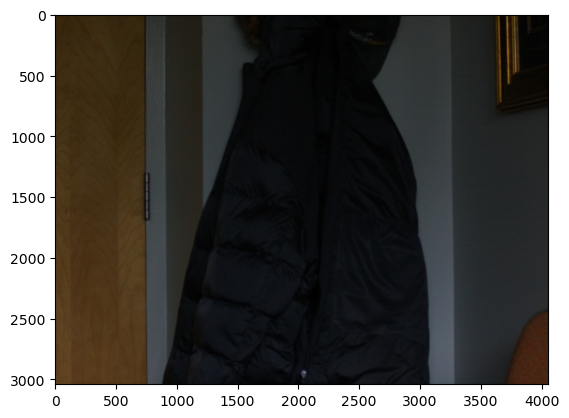

In [5]:
import matplotlib.pyplot as plt

img = plt.imread("test.jpeg")
plt.imshow(img)

#### Capture an Image with Picamera

A common use case is using a Python script to capture an image.

In [8]:
from picamera2 import Picamera2, Preview
import time

picam2 = Picamera2()

camera_config = picam2.create_still_configuration(main={"size": (1920, 1080)})
picam2.configure(camera_config)
picam2.start()
exif = picam2.capture_file("test.jpg")
picam2.close()

for key, val in exif.items():
    print(key, ":", val)

[1:20:28.509894146] [3125]  INFO Camera camera_manager.cpp:293 libcamera v0.0.1+54-d528119f
[1:20:28.575917556] [3180]  INFO RPI raspberrypi.cpp:1414 Registered camera /base/soc/i2c0mux/i2c@1/imx477@1a to Unicam device /dev/media1 and ISP device /dev/media2
[1:20:28.588821282] [3125]  INFO Camera camera.cpp:1026 configuring streams: (0) 1920x1080-BGR888
[1:20:28.589414549] [3180]  INFO RPI raspberrypi.cpp:800 Sensor: /base/soc/i2c0mux/i2c@1/imx477@1a - Selected sensor format: 2028x1080-SBGGR12_1X12 - Selected unicam format: 2028x1080-pBCC


SensorTimestamp : 4829372504000
ExposureTime : 66657
SensorTemperature : 22.0
FocusFoM : 608
ColourCorrectionMatrix : (1.9913883209228516, -0.8442877531051636, -0.14709094166755676, -0.26623067259788513, 1.7305384874343872, -0.4643173813819885, -0.09931771457195282, -0.4772596061229706, 1.5765773057937622)
FrameDuration : 66991
AeLocked : False
AnalogueGain : 7.474452495574951
ColourGains : (3.1889021396636963, 1.532944917678833)
DigitalGain : 1.0704489946365356
ColourTemperature : 6050
Lux : 9.540560722351074
SensorBlackLevels : (4096, 4096, 4096, 4096)
ScalerCrop : (108, 440, 3840, 2160)


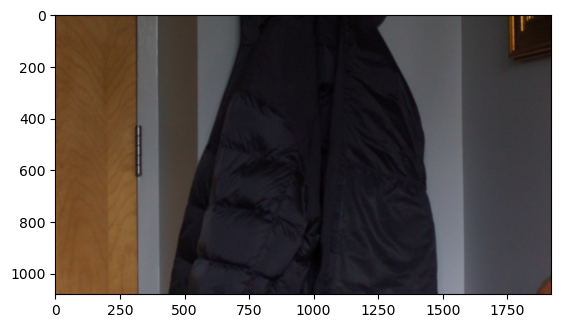

In [5]:
import matplotlib.pyplot as plt

img = plt.imread("test.jpg")
plt.imshow(img)

In [9]:
!mail --help

/bin/bash: line 1: mail: command not found
